# Geopandas Intro

**Inhalt:** Erste Schritte mit Geopandas

**Nötige Skills**
- Basic pandas skills
- Funktionen und pandas

**Lernziele**
- Shapes kennenlernen
- Punkte und Linien erstellen
- Geodataframes erstellen
- Geometrien definieren
- Plotten in Geopandas

## Das Beispiel

Bergbahnen in der Schweiz. Wir laden die geografischen Informationen sämtlicher Bergbahnen und stellen sie auf einer Karte dar.

## Setup

In [ ]:
import pandas as pd

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, LineString

In [ ]:
from IPython.display import Image

## Import

**Ein Shapefile für die Schweizer Kantone**

Dieses File brauchen wir erst ganz am Schluss.

In [ ]:
gdf_kantone = gpd.read_file('dataprojects/Projections/shp/g1k17.shp')

In [ ]:
gdf_kantone.head(2)

**Eine Liste der Bergbahnen**

Mit dieser Liste werden wir hauptsächlich arbeiten.

In [ ]:
df_bergbahnen = pd.read_excel('dataprojects/Projections/data/bergbahnen3D.xlsx')

In [ ]:
df_bergbahnen.head(2)

In [ ]:
df_bergbahnen['OBJEKTART'].value_counts()

## Geometrien in Geopandas

Geodataframes sind eigentlich nichts anderes als normale Dataframes. Mit einem Unterschied: Eine Spalte im Geodataframe hat eine besondere Funktion: Hier sind geometrische Informationen enthalten.

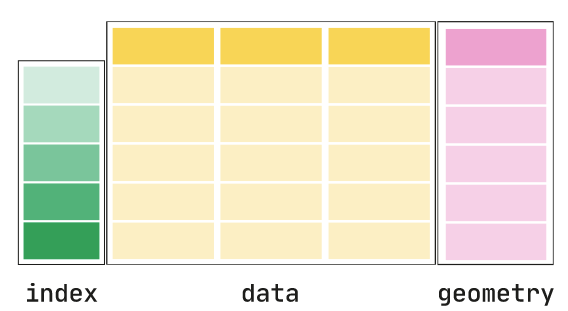

In [36]:
Image("dataprojects/Intro/geodataframe.png")

In unserem Shapefile der Kantone (\*.shp) ist bereits eine Geometrie definiert: Eine separate Spalte in jedem Kanton ist dafür reserviert.

In [ ]:
gdf_kantone.columns

In der Geometrie-Spalte sind (Überraschung!) geometrische Informationen drin. In diesem Fall: ein Polygon.

In [ ]:
gdf_kantone.geometry

Daher können wir die 26 Schweizer Kantone auch ganz einfach plotten. Und zwar mit`plot()`:

In [ ]:
gdf_kantone.plot()

Unsere Bergbahnen-Liste hat allerdings noch keine Geometrie-Spalte:

In [ ]:
df_bergbahnen.columns

Daher kommt mit dem `plot()`-Befehl auch noch nichts sinnvolles raus:

In [ ]:
df_bergbahnen.plot()

Bevor wir irgendwas plotten können, müssen wir erst eine Geometrie erstellen!

**Dazu müssen wir einige Dinge klären:**
- Welche Art von Geometrie wollen wir kreieren?
- Gibt es mehrere Möglichkeiten?
- Welches sind die nötigen Informationen dafür?

### Geometrie erstellen

**Zur Erinnerung: Points()-Funktion**

Diese Funktion brauchen wir, um eine Punkt-Geometrie zu erstellen.

So erstellen Sie einen Punkt am Ort (5, -7)

In [ ]:
x = 5
y = -7

In [ ]:
punkt = Point(x, y)

In [ ]:
punkt

**In Pandas arbeiten mit apply()**

Unser Ziel ist: eine Spalte in unserem Dataframe zu haben, die für jede Bergbahn eine Punkt-Geometrie enthält.

Mit anderen Worten: Wir müssen die x- und y-Koordinaten für jeden Eintrag aus der Tabelle auslesen und mit `Point()` zu einer Punkt-Geometrie machen.

In Pandas funktioniert das folgendermassen:

In [ ]:
df_bergbahnen['Punkt1'] = df_bergbahnen.apply(lambda row: Point(row['MIN_E'], row['MIN_N']), axis=1)

In [ ]:
df_bergbahnen.head(2)

Zum technischen Verständnis:
- Wir haben mit dem `lambda`-Keyword eine Funktion definiert, welche die `Points()`-Funktion aufruft
- Dann haben wir diese (namenlose) Funktion mit `apply()` für jede Zeile in der Tabelle angewandt

Das Ergebnis ist: Wir haben jetzt eine Geometrie erstellt

Jetzt müssen wir Geopandas noch mitteilen, dass wir diese Geometrie verwenden wollen!

### Geometrie anwenden in Geopandas

Mit anderen Worten: Wir müssen aus dem Dataframe erst ein Geodataframe erstellen!

**Geodataframe konstruieren**

Die Konstruktor-Funktion heisst `GeoDataFrame()`. Zwei Infos sind nötig:
- Aus welchem Dataframe soll ein Geodataframe werden
- Welche Spalte soll die Geometrie definieren

In [ ]:
gdf_bergbahnen = gpd.GeoDataFrame(df_bergbahnen, geometry='Punkt1')

In [ ]:
gdf_bergbahnen.head(2)

Jetzt können wir plotten:

In [ ]:
gdf_bergbahnen.geometry

In [ ]:
gdf_bergbahnen.plot(figsize=(14,10), markersize=3)

Oder zB auch nur einzele, ausgewählte Objekte:

In [ ]:
gdf_bergbahnen[gdf_bergbahnen['OBJEKTART'] == 'Luftseilbahn'].plot(figsize=(14,10), markersize=3)

## Geometrien 2

Allerdings - moment mal. Unsere Seilbahnen sind eigentlich keine Punkte, sondern müssten eigentlich eine Linie sein - mit einem Anfang und einem Ende.

### Linie (again!)

**Quiz:** Erstellen Sie eine Linie durch die Punkte (8, 6) und (4, 10)

### in Pandas

**Einen zweiten Punkt erstellen**

Quiz: Erstellen Sie für jede Zeile einen Punkt2 anhand der Spalten 'MAX_E' und 'MAX_N'

Tipp: Wir wollen eine lambda-Funktion dafür verwenden

**Eine Linie daraus machen**

Quiz: Erstellen Sie für jede Zeile eine Linie anhand der beiden Punkt-Spalten, die wir zuvor erstellt haben

**Geometrie neu setzen**

Quiz: Stellen Sie die Geometrie des GDF um auf die Linien-Spalte

**Und Plot:**

Quiz: Ein Plot von allen Luftseilbahnen

In [ ]:
gdf_bergbahnen.geometry

## Mehrere Layer

Was sich immer gut macht, ist, eine Liste von Punkten auf irgendeinen geografischen Basislayer zu plotten.

An dieser Stelle verwenden wir:
- Das Geodataframe mit den Kantonen
- Das Geodagaframe mit den Bergbahnen

In [ ]:
ax = gdf_kantone.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_bergbahnen[gdf_bergbahnen['OBJEKTART'] == 'Luftseilbahn'].plot(figsize=(14,10), markersize=3, ax=ax)